In [3]:
import sys, os 
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Dense, Dropout, Flatten, Input, Conv2D, Activation, Layer, ReLU, Softmax, BatchNormalization, MaxPool2D, AveragePooling2D, Rescaling, CenterCrop, RandomRotation, Embedding, Reshape, Add)
from tensorflow.keras.regularizers import l1_l2
import numpy as np 
import cv2 as cv 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
# func to convert .png to .jpg files (.png files have 4 color channels, so regularize input file type with this func)
def png_to_jpg(input_dir, output_dir):
    for file in os.listdir(input_dir):
        if file.endswith('.png'):
            filePath = os.path.join(input_dir, file)
            image = cv.imread(filePath)
            output_file = os.path.splitext(file)[0]+".jpg"
            output_filepath = os.path.join(output_dir, output_file)
            cv.imwrite(output_filepath, image)
            os.remove(filePath)
    return

In [5]:
## Read in the images, create class labels, and preprocess for input into CNN ##
#num_classes = 36

path = '/Users/andy/particle_zoo/particle_zoo_organized_images' # change image path accordingly

# list to store particle (class) names
particle_types = []

# list to store all particle images. This is what will be randomly shuffled and will be train/validation/test split
images = []

for fileName in os.listdir(path):
    
    if not fileName.startswith("."):
        print(fileName)
        sub_dir_path = os.path.join(path, fileName)
        png_to_jpg(sub_dir_path, sub_dir_path)
        particle_types.append(fileName)
        
        if os.path.isdir(sub_dir_path):
            
            # loop over each file in each sub directory and append to a list of images
            for file in os.listdir(sub_dir_path):
             
                # ignore hidden files that your os may generate
                if not file.startswith('.'):
                    print(file)

                    # create directory path for the image
                    directory = os.path.join(sub_dir_path, file)
                    
                    # read in each image using openCV
                    image = cv.imread(directory)
                    # resize the images accordingly
                    image = cv.resize(image, (32,32))
                    # append to the list we are storing images
                    images.append(image)
                    # now detect the circle in the image
                    
                    

antitop quark
20230228_164658.jpg
20230228_164704.jpg
IMG_20221202_185454.jpg
20221202_185159.jpg
20230228_164707.jpg
20230228_164702.jpg
20230228_164715.jpg
20230228_164700.jpg
Screen Shot 2023-02-07 at 9.02.04 AM.jpg
20230228_164731.jpg
Screen Shot 2023-02-07 at 8.46.08 AM.jpg
20221202_185157.jpg
IMG_20221202_185458.jpg
Screen Shot 2023-02-07 at 9.18.07 AM.jpg
antiup quark
20230228_173654.jpg
20230228_173652.jpg
Screen Shot 2023-02-07 at 8.45.53 AM.jpg
IMG_20221202_185256.jpg
IMG_20221202_185312.jpg
20230228_173649.jpg
20230228_173648.jpg
20230228_173702.jpg
Screen Shot 2023-02-07 at 9.02.18 AM.jpg
IMG_20221202_185303.jpg
20230228_173658.jpg
Screen Shot 2023-02-07 at 9.16.22 AM.jpg
20221202_185725.jpg
20221202_185727.jpg
down quark
Screen Shot 2023-02-07 at 8.45.26 AM.jpg
20230228_174410.jpg
20230228_174449.jpg
20221202_185215.jpg
20221202_185219.jpg
20230228_174442.jpg
Screen Shot 2023-02-07 at 9.17.49 AM.jpg
20230228_174440.jpg
20230228_174447.jpg
20230228_174436.jpg
Screen Shot 20

20230228_173601.jpg
20230228_173604.jpg
20230228_173610.jpg
20230228_173607.jpg
20230228_173612.jpg
Screen Shot 2023-02-07 at 9.03.22 AM.jpg
antineutron
20221202_185529.jpg
20230228_173427.jpg
20230228_173433.jpg
Screen Shot 2023-02-07 at 9.16.15 AM.jpg
20230228_173426.jpg
Screen Shot 2023-02-07 at 9.03.29 AM.jpg
20230228_173443.jpg
20230228_173441.jpg
Screen Shot 2023-02-07 at 8.46.54 AM.jpg
20230228_173446.jpg
20230228_173429.jpg
20221202_185523.jpg
IMG_20221202_185206.jpg
20221202_185527.jpg
20230228_173439.jpg
IMG_20221202_185200.jpg
top quark
20230228_174011.jpg
Screen Shot 2023-02-07 at 8.44.43 AM.jpg
20230228_174017.jpg
20230228_174015.jpg
20230228_174001.jpg
IMG_20221202_185044.jpg
Screen Shot 2023-02-07 at 9.16.48 AM.jpg
IMG_20221202_185053.jpg
20230228_173914.jpg
20221202_185656.jpg
20230228_174031.jpg
20221202_185655.jpg
20230228_174026.jpg
20230228_173953.jpg
20230228_174023.jpg
Screen Shot 2023-02-07 at 9.02.55 AM.jpg
Higgs Boson
Screen Shot 2023-02-07 at 8.45.49 AM.jpg
Sc

In [6]:
# store images and labels in a dictionary
particle_dict = dict.fromkeys(particle_types)

for fileName in os.listdir(path):
    
    if not fileName.startswith("."):
        particle_dict[fileName] = []
        sub_dir_path = os.path.join(path, fileName)
        if os.path.isdir(sub_dir_path):
            
            # loop over each file in each sub directory and append to a list of images
            for file in os.listdir(sub_dir_path):
                # ignore hidden files that your os may generate
                if not file.startswith('.'):
                    directory = os.path.join(sub_dir_path, file)
                    image = cv.imread(directory)
                    image = cv.resize(image,(32,32))
                    particle_dict[fileName].append(image)                   
                    
labels = []
for key, value in particle_dict.items():
    for i in range(len(value)):
        labels.append(key)
one_hot_labels = pd.get_dummies(labels).values

images = np.array(images)
        
x_train, x_val, y_train, y_val = train_test_split(images, one_hot_labels, random_state = 42, test_size = 0.2, stratify = one_hot_labels)

x_train, X_test, y_train, Y_test = train_test_split(x_train, y_train, random_state = 42, test_size = 0.25, stratify = y_train)

In [7]:
# Benchmark model parameters(unqauntized)
l1p=0
l2p=1e-4

In [ ]:
# # ResNet8 based model used for Pokemon Demo (w/o residual connections)

# # Input Layer
# inp = Input(shape=(32,32,3))
# x = Conv2D(num_filters=16,
#            kernel_size=(3,3),
#            strides=1, 
#            padding='same', 
#            kernel_initializer='he_normal', 
#            kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(inp)
# x = BatchNormalization()(inp)
# x = Activation('relu')(x)

# # First Stack 
# # Weight Layers
# y = Conv2D(num_filters=16,
#            kernel_size=(3,3), 
#            padding='same',
#            strides=1
#            kernel_initializer='he_normal', 
#            kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)
# y = BatchNormalization()(y)
# y = Activation('relu')(y)
# y = Conv2D(num_filters=16,
#            kernel_size=(3,3), 
#            padding='same',
#            strides=1
#            kernel_initializer='he_normal', 
#            kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(y)
# y = BatchNormalization()(y)
# y = Activation('relu')

# # Second Stack
# y = Conv2D(num_filters=)

In [ ]:
# This is the out of the box model that was used for one of the legacy Pokemon Demos
# All that was changed was that the num_classes=36. Needs more hyperparameter tuning to find best benchmark model.
def resnet_v1_eembc(input_shape=[32, 32, 3], num_classes=36, l1p=0, l2p=1e-4,
                    num_filters=[16, 16,  # block 1
                                 32, 32,  # block 2
                                 64, 64  # block 3
                                 ],
                    kernel_sizes=[3, 3, 3,  # block 1
                                  3, 3, 1,  # block 2
                                  3, 3, 1  # block 3
                                  ],
                    strides=['111',  # block 1
                             '212',  # block 2
                             '212',  # block 3
                             ],
                    skip=True,
                    avg_pooling=False):

    # Input layer, change kernel size to 7x7 and strides to 2 for an official resnet
    inputs = Input(shape=input_shape)
    x = Conv2D(num_filters[0],
               kernel_size=kernel_sizes[0],
               strides=int(strides[0][0]),
               padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # First stack
    # Weight layers
    y = Conv2D(num_filters[1],
               kernel_size=kernel_sizes[1],
               strides=int(strides[0][1]),
               padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Conv2D(num_filters[0],
               kernel_size=kernel_sizes[2],
               strides=int(strides[0][2]),
               padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(y)
    y = BatchNormalization()(y)

    # Overall residual, connect weight layer and identity paths
    if skip:
        x = Add()([x, y])
    else:
        x = y
    x = Activation('relu')(x)

    if len(num_filters) > 2 and num_filters[2] > 0 and strides[1] != '' and kernel_sizes[3] > 0:
        # Second stack
        # Weight layers
        y = Conv2D(num_filters[2],
                   kernel_size=kernel_sizes[3],
                   strides=int(strides[1][0]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(num_filters[3],
                   kernel_size=kernel_sizes[4],
                   strides=int(strides[1][1]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(y)
        y = BatchNormalization()(y)

        # Adjust for change in dimension due to stride in identity
        x = Conv2D(num_filters[3],
                   kernel_size=kernel_sizes[5],
                   strides=int(strides[1][2]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)

        # Overall residual, connect weight layer and identity paths
        if skip:
            x = Add()([x, y])
        else:
            x = y
        x = Activation('relu')(x)

    if len(num_filters) > 4 and num_filters[4] > 0 and strides[2] != '' and kernel_sizes[6] > 0:
        # Third stack
        # Weight layers
        y = Conv2D(num_filters[4],
                   kernel_size=kernel_sizes[6],
                   strides=int(strides[2][0]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(num_filters[5],
                   kernel_size=kernel_sizes[7],
                   strides=int(strides[2][1]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(y)
        y = BatchNormalization()(y)

        # Adjust for change in dimension due to stride in identity
        x = Conv2D(num_filters[5],
                   kernel_size=kernel_sizes[8],
                   strides=int(strides[2][2]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)

        # Overall residual, connect weight layer and identity paths
        if skip:
            x = Add()([x, y])
        else:
            x = y
        x = Activation('relu')(x)

#     if len(num_filters) > 6 and num_filters[6] > 0 and strides[3] != '' and kernel_sizes[9] > 0:
#         # Fourth stack (not complete stack)
#         # Weight layers
#         y = Conv2D(num_filters[6],
#                    kernel_size=kernel_sizes[9],
#                    strides=int(strides[3][0]),
#                    padding='same',
#                    kernel_initializer='he_normal',
#                    kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)
#         y = BatchNormalization()(y)
#         x = Activation('relu')(y)

#     if len(num_filters) > 7 and num_filters[7] > 0 and strides[3] != '' and kernel_sizes[10] > 0:
#         y = x
#         y = Conv2D(num_filters[7],
#                    kernel_size=kernel_sizes[10],
#                    strides=int(strides[3][1]),
#                    padding='same',
#                    kernel_initializer='he_normal',
#                    kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(y)
#         y = BatchNormalization()(y)
#         x = Activation('relu')(y)

#         # Overall residual, connect weight layer and identity paths
#         if skip:
#             y = QActivation(activation=logit_quantizer)(y)
#             x = Add()([x, y])
#         else:
#             x = y
#         x = QActivation(activation=activation_quantizer)(x)

    # Final classification layer.
    pool_size = int(np.amin(x.shape[1:3]))
    if pool_size > 1 and avg_pooling:
        x = AveragePooling2D(pool_size=pool_size)(x)
    y = Flatten()(x)
    y = Dense(num_classes,
              kernel_initializer='he_normal')(y)
    outputs = Activation('softmax', name='softmax')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model = resnet_v1_eembc()

In [ ]:
model.summary()

In [ ]:
n_epochs=100
batch_size=36

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_val, y_val))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
y_score = model.predict(X_test)
df = pd.DataFrame()
fpr  = {}
tpr  = {}
auc1 = {}
labels=['%i'%nr for nr in range (0,36)]
print('Plotting ROC for labels {}'.format(labels))

fig, ax = plt.subplots(figsize=(15, 10))
for i, label in enumerate(labels):
    df[label] = Y_test[:,int(label)]
    df[label + '_pred'] = y_score[:, int(label)]
    fpr[label], tpr[label], threshold = metrics.roc_curve(df[label],df[label+'_pred'])
    auc1[label] = metrics.auc(fpr[label], tpr[label])
    
    plt.plot(fpr[label],tpr[label], label=r'{}, AUC = {:.1f}%'.format(particle_types[int(label)],auc1[label]*100))

plt.plot([0,1], [0,1], "k--", label="Chance, AUC = 50%")
    
#plt.semilogx()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlim(-0.1,1.5)
plt.ylim(0,1.1)
plt.legend(loc='lower right')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Macro Average One vs Rest
macro_fpr = {}
macro_tpr = {}
macro_auc = {}
n_classes = 36
for i in range(n_classes):
    macro_fpr[i], macro_tpr[i], _ = metrics.roc_curve(Y_test[:, i], y_score[:, i])
    macro_auc[i] = metrics.auc(macro_fpr[i], macro_tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, macro_fpr[i], macro_tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

macro_auc = metrics.auc(fpr_grid, mean_tpr)

plt.plot(
    fpr_grid,
    mean_tpr,
    label=f"Macro-average ROC curve, AUC = {macro_auc:.2f}",
)

# Micro Average One vs Rest
test_ravel = Y_test.ravel()
pred_ravel = y_score.ravel()
micro_fpr, micro_tpr, threshold = metrics.roc_curve(test_ravel, pred_ravel)
auc = metrics.auc(micro_fpr, micro_tpr) 
    
plt.plot(micro_fpr,micro_tpr, label=f"Micro-average ROC curve, AUC = {auc:.2f}")

plt.plot([0,1], [0,1], "k--", label="Chance, AUC = 50%")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlim(-0.1,1.1)
plt.ylim(0,1.1)
plt.legend(loc='lower right')
plt.show()

In [120]:
n_epochs= 2000
batch_size=20 # batch_size = 20 worked to get the auc = 0.71
# initializer = 'lecun_uniform'# (try hyperparameter search for the initializer)
initializer = 'he_uniform'
l2_regularizer = tf.keras.regularizers.l2(0.1) # alpha=0.1 produces a macro and micro ROC of 0.71
l1_regularizer = tf.keras.regularizers.l1(0.001)

In [121]:
# Image Preprocessor 
inp_batch_image = Input(shape=(32,32,3))
image = Rescaling(1./255)(inp_batch_image)
image = RandomRotation(0.1)(inp_batch_image)
# Add random translation. How do you get only one output array and not batch using the preprocessing layer so that each image can be appended to data to add variance? 
preprocessor = Model(inputs=inp_batch_image, outputs=image)

# Create tf.data pipeline of augmented training images and labels
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.batch(batch_size).map(lambda x, y: (preprocessor(x), y))

# Do the same for validation images
# Validation data tf.data pipeline to evaluate the model
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size=10000)
val_dataset = val_dataset.batch(batch_size).map(lambda x, y: (preprocessor(x), y))

In [128]:
# The model we have made and trained 
inputs = Input(shape=(32,32,3))
x = BatchNormalization()(inputs)
x = Conv2D(3, 2, 
           kernel_initializer=initializer, 
           kernel_regularizer = l2_regularizer)(x)
x = Activation('relu', )(x)
x = Conv2D(2, 3, 
           kernel_initializer=initializer,
           kernel_regularizer = l2_regularizer)(x)
x = BatchNormalization()(x) # Change
x = Activation('relu')(x)
x = MaxPool2D(3,3)(x)
x = Conv2D(2, 3, 
           kernel_initializer=initializer, 
           kernel_regularizer = l2_regularizer)(x)
x = BatchNormalization()(x) # Change
x = Activation('relu')(x)
x = AveragePooling2D(4,4)(x) # Change (3,3)->(2,2)->(5,5)->(4,4)
x = Flatten()(x)
    
# x = keras.layers.AlphaDropout(0.1)(x)

# x = Dense(5, kernel_initializer=initializer)(x)
# x = keras.activations.sigmoid(x)
x = BatchNormalization()(x) # Change 
# x = Activation('leaky_relu')(x)
x = Dense(36, kernel_initializer=initializer, kernel_regularizer=l2_regularizer)(x)
x = BatchNormalization()(x)
outputs = Activation('softmax')(x)

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #0.0001 is the golden rate so far. over fits for higher rates (sometimes)

## create/declare cnn model 
convNet = Model(inputs = inputs, outputs = outputs)

# convNet.compile(loss = 'categorical_crossentropy',
#                 metrics = ['accuracy'],
#                 optimizer = opt)
convNet.compile(loss = 'categorical_crossentropy', optimizer = opt)
convNet.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 batch_normalization_54 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_54 (Conv2D)          (None, 31, 31, 3)         39        
                                                                 
 activation_72 (Activation)  (None, 31, 31, 3)         0         
                                                                 
 conv2d_55 (Conv2D)          (None, 29, 29, 2)         56        
                                                                 
 batch_normalization_55 (Bat  (None, 29, 29, 2)        8         
 chNormalization)                                         

In [129]:
historyV2 = convNet.fit(train_dataset, epochs=n_epochs, validation_data=val_dataset) # validation_data=(x_val, y_val))

Epoch 1/2000
17/17 [==============================] - 1s 9ms/step - loss: 11.8497 - val_loss: 13.9105
Epoch 2/2000
17/17 [==============================] - 0s 6ms/step - loss: 11.5060 - val_loss: 12.5837
Epoch 3/2000
17/17 [==============================] - 0s 5ms/step - loss: 11.2896 - val_loss: 11.9457
Epoch 4/2000
17/17 [==============================] - 0s 5ms/step - loss: 11.0261 - val_loss: 11.5520
Epoch 5/2000
17/17 [==============================] - 0s 5ms/step - loss: 10.7630 - val_loss: 11.1134
Epoch 6/2000
17/17 [==============================] - 0s 6ms/step - loss: 10.5103 - val_loss: 10.7283
Epoch 7/2000
17/17 [==============================] - 0s 6ms/step - loss: 10.3095 - val_loss: 10.3899
Epoch 8/2000
17/17 [==============================] - 0s 6ms/step - loss: 10.0574 - val_loss: 10.1047
Epoch 9/2000
17/17 [==============================] - 0s 6ms/step - loss: 9.8377 - val_loss: 9.8506
Epoch 10/2000
17/17 [==============================] - 0s 6ms/step - loss: 9.6339 - 

17/17 [==============================] - 0s 5ms/step - loss: 3.7995 - val_loss: 4.0755
Epoch 83/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.7764 - val_loss: 4.0522
Epoch 84/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.7494 - val_loss: 4.0369
Epoch 85/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.7587 - val_loss: 4.0110
Epoch 86/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.7087 - val_loss: 3.9681
Epoch 87/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.6956 - val_loss: 3.9496
Epoch 88/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.6608 - val_loss: 3.9485
Epoch 89/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.6373 - val_loss: 3.9222
Epoch 90/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.6283 - val_loss: 3.9069
Epoch 91/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.5967 - val_loss: 3.8919
Epoc

17/17 [==============================] - 0s 5ms/step - loss: 3.0394 - val_loss: 3.2960
Epoch 163/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.0396 - val_loss: 3.4155
Epoch 164/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.0564 - val_loss: 3.2781
Epoch 165/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.0751 - val_loss: 3.2942
Epoch 166/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.0521 - val_loss: 3.2463
Epoch 167/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.0587 - val_loss: 3.3844
Epoch 168/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.0354 - val_loss: 3.1663
Epoch 169/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.0432 - val_loss: 3.3500
Epoch 170/2000
17/17 [==============================] - 0s 5ms/step - loss: 3.0398 - val_loss: 3.2993
Epoch 171/2000
17/17 [==============================] - 0s 6ms/step - loss: 3.0463 - val_loss: 3.

17/17 [==============================] - 0s 5ms/step - loss: 2.9375 - val_loss: 3.9922
Epoch 243/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.9126 - val_loss: 4.1465
Epoch 244/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.8937 - val_loss: 3.9815
Epoch 245/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.9124 - val_loss: 3.6779
Epoch 246/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.9056 - val_loss: 3.3908
Epoch 247/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.9128 - val_loss: 3.1885
Epoch 248/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.9164 - val_loss: 3.1307
Epoch 249/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.9197 - val_loss: 3.1535
Epoch 250/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.8979 - val_loss: 3.5378
Epoch 251/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.8912 - val_loss: 3.

17/17 [==============================] - 0s 5ms/step - loss: 2.7935 - val_loss: 3.5428
Epoch 323/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.8149 - val_loss: 3.3068
Epoch 324/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.8188 - val_loss: 3.0736
Epoch 325/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.8059 - val_loss: 3.3582
Epoch 326/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7929 - val_loss: 3.2533
Epoch 327/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.8421 - val_loss: 3.3942
Epoch 328/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.8508 - val_loss: 3.2112
Epoch 329/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.8180 - val_loss: 3.1242
Epoch 330/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7704 - val_loss: 3.1775
Epoch 331/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7951 - val_loss: 3.

17/17 [==============================] - 0s 5ms/step - loss: 2.7481 - val_loss: 3.1279
Epoch 403/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7633 - val_loss: 3.1578
Epoch 404/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7564 - val_loss: 3.2088
Epoch 405/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7692 - val_loss: 3.1217
Epoch 406/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7809 - val_loss: 3.1678
Epoch 407/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7332 - val_loss: 3.0584
Epoch 408/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7354 - val_loss: 3.0898
Epoch 409/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.8179 - val_loss: 3.3592
Epoch 410/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7455 - val_loss: 4.0593
Epoch 411/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7802 - val_loss: 3.

17/17 [==============================] - 0s 5ms/step - loss: 2.6567 - val_loss: 3.3137
Epoch 483/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6764 - val_loss: 3.1966
Epoch 484/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6656 - val_loss: 3.2506
Epoch 485/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7303 - val_loss: 2.9783
Epoch 486/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7208 - val_loss: 3.2203
Epoch 487/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6930 - val_loss: 3.2690
Epoch 488/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7003 - val_loss: 3.0059
Epoch 489/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7208 - val_loss: 3.1032
Epoch 490/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6933 - val_loss: 3.0908
Epoch 491/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7263 - val_loss: 3.

17/17 [==============================] - 0s 5ms/step - loss: 2.6912 - val_loss: 3.1848
Epoch 563/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6751 - val_loss: 3.3810
Epoch 564/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6866 - val_loss: 3.2905
Epoch 565/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6904 - val_loss: 3.5447
Epoch 566/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6864 - val_loss: 3.5700
Epoch 567/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6837 - val_loss: 3.4720
Epoch 568/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6425 - val_loss: 3.2557
Epoch 569/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6812 - val_loss: 3.1028
Epoch 570/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6706 - val_loss: 3.1277
Epoch 571/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6471 - val_loss: 3.

17/17 [==============================] - 0s 5ms/step - loss: 2.6453 - val_loss: 3.1889
Epoch 643/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6631 - val_loss: 3.2637
Epoch 644/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6783 - val_loss: 3.5293
Epoch 645/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6443 - val_loss: 3.4927
Epoch 646/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6376 - val_loss: 3.4127
Epoch 647/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5973 - val_loss: 3.0374
Epoch 648/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6691 - val_loss: 3.2509
Epoch 649/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6703 - val_loss: 3.6938
Epoch 650/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7363 - val_loss: 3.6061
Epoch 651/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6631 - val_loss: 3.

17/17 [==============================] - 0s 5ms/step - loss: 2.6340 - val_loss: 3.2785
Epoch 723/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6078 - val_loss: 3.0407
Epoch 724/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6541 - val_loss: 2.9756
Epoch 725/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6397 - val_loss: 3.3706
Epoch 726/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5932 - val_loss: 3.4048
Epoch 727/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5932 - val_loss: 3.1352
Epoch 728/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6306 - val_loss: 2.9951
Epoch 729/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6034 - val_loss: 3.0126
Epoch 730/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6197 - val_loss: 3.5520
Epoch 731/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6468 - val_loss: 4.

17/17 [==============================] - 0s 5ms/step - loss: 2.6119 - val_loss: 3.0932
Epoch 803/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6416 - val_loss: 3.1806
Epoch 804/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5707 - val_loss: 3.1827
Epoch 805/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5893 - val_loss: 3.1458
Epoch 806/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6193 - val_loss: 3.1321
Epoch 807/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6144 - val_loss: 3.1327
Epoch 808/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6667 - val_loss: 3.2501
Epoch 809/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5430 - val_loss: 3.1828
Epoch 810/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6342 - val_loss: 3.0138
Epoch 811/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6187 - val_loss: 3.

17/17 [==============================] - 0s 5ms/step - loss: 2.6162 - val_loss: 3.0720
Epoch 883/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5848 - val_loss: 3.2979
Epoch 884/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6153 - val_loss: 3.5962
Epoch 885/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5735 - val_loss: 3.9248
Epoch 886/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5827 - val_loss: 4.4991
Epoch 887/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5886 - val_loss: 3.5364
Epoch 888/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5716 - val_loss: 3.6140
Epoch 889/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5980 - val_loss: 4.9062
Epoch 890/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5847 - val_loss: 4.8913
Epoch 891/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5971 - val_loss: 4.

17/17 [==============================] - 0s 7ms/step - loss: 2.6055 - val_loss: 3.0647
Epoch 963/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6143 - val_loss: 3.0817
Epoch 964/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5631 - val_loss: 3.0525
Epoch 965/2000
17/17 [==============================] - 0s 7ms/step - loss: 2.6104 - val_loss: 3.1214
Epoch 966/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.4983 - val_loss: 3.0473
Epoch 967/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5433 - val_loss: 3.2534
Epoch 968/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5407 - val_loss: 3.5191
Epoch 969/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5399 - val_loss: 3.2604
Epoch 970/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5844 - val_loss: 3.4777
Epoch 971/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5312 - val_loss: 3.

17/17 [==============================] - 0s 6ms/step - loss: 2.5699 - val_loss: 3.6583
Epoch 1043/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5824 - val_loss: 5.3091
Epoch 1044/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5731 - val_loss: 3.9557
Epoch 1045/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5742 - val_loss: 4.5295
Epoch 1046/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5960 - val_loss: 3.3926
Epoch 1047/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.7071 - val_loss: 3.6575
Epoch 1048/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6041 - val_loss: 4.1098
Epoch 1049/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6273 - val_loss: 3.7350
Epoch 1050/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5600 - val_loss: 4.3548
Epoch 1051/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5612 - val

17/17 [==============================] - 0s 5ms/step - loss: 2.5500 - val_loss: 3.1573
Epoch 1122/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5742 - val_loss: 3.1912
Epoch 1123/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5882 - val_loss: 3.2801
Epoch 1124/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5784 - val_loss: 3.0000
Epoch 1125/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5212 - val_loss: 3.0597
Epoch 1126/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5149 - val_loss: 3.0986
Epoch 1127/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5758 - val_loss: 3.1865
Epoch 1128/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5891 - val_loss: 3.1147
Epoch 1129/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5606 - val_loss: 3.3580
Epoch 1130/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5269 - val

17/17 [==============================] - 0s 6ms/step - loss: 2.6000 - val_loss: 3.7665
Epoch 1201/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5837 - val_loss: 3.7818
Epoch 1202/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5197 - val_loss: 3.8953
Epoch 1203/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5400 - val_loss: 4.0264
Epoch 1204/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5626 - val_loss: 3.8737
Epoch 1205/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5651 - val_loss: 4.1788
Epoch 1206/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5130 - val_loss: 4.0855
Epoch 1207/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5319 - val_loss: 3.9468
Epoch 1208/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5251 - val_loss: 4.7165
Epoch 1209/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5974 - val

17/17 [==============================] - 0s 5ms/step - loss: 2.5082 - val_loss: 3.1588
Epoch 1280/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5416 - val_loss: 3.9358
Epoch 1281/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5098 - val_loss: 3.2005
Epoch 1282/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5272 - val_loss: 3.4641
Epoch 1283/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4730 - val_loss: 3.2126
Epoch 1284/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5540 - val_loss: 3.2892
Epoch 1285/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5508 - val_loss: 3.5431
Epoch 1286/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5539 - val_loss: 3.3211
Epoch 1287/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5487 - val_loss: 3.3222
Epoch 1288/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5611 - val

17/17 [==============================] - 0s 6ms/step - loss: 2.5881 - val_loss: 3.2521
Epoch 1359/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5788 - val_loss: 3.3581
Epoch 1360/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5744 - val_loss: 3.4649
Epoch 1361/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4949 - val_loss: 3.3562
Epoch 1362/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5375 - val_loss: 3.3527
Epoch 1363/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5783 - val_loss: 3.2262
Epoch 1364/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6364 - val_loss: 3.2483
Epoch 1365/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5872 - val_loss: 3.2388
Epoch 1366/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5534 - val_loss: 3.8328
Epoch 1367/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5272 - val

17/17 [==============================] - 0s 6ms/step - loss: 2.4444 - val_loss: 3.2159
Epoch 1438/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5107 - val_loss: 3.5267
Epoch 1439/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.5152 - val_loss: 4.5393
Epoch 1440/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4847 - val_loss: 4.7439
Epoch 1441/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5014 - val_loss: 4.6690
Epoch 1442/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5268 - val_loss: 4.6989
Epoch 1443/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4994 - val_loss: 4.3711
Epoch 1444/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5041 - val_loss: 3.9254
Epoch 1445/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5372 - val_loss: 3.7363
Epoch 1446/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5315 - val

17/17 [==============================] - 0s 5ms/step - loss: 2.5772 - val_loss: 3.5594
Epoch 1517/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4934 - val_loss: 3.6413
Epoch 1518/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5340 - val_loss: 3.4967
Epoch 1519/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4907 - val_loss: 3.3922
Epoch 1520/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5947 - val_loss: 3.8103
Epoch 1521/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5003 - val_loss: 3.7543
Epoch 1522/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5031 - val_loss: 4.2129
Epoch 1523/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6919 - val_loss: 3.2247
Epoch 1524/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.6687 - val_loss: 3.8448
Epoch 1525/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5186 - val

17/17 [==============================] - 0s 5ms/step - loss: 2.7634 - val_loss: 3.4020
Epoch 1596/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6426 - val_loss: 3.4517
Epoch 1597/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5096 - val_loss: 3.6736
Epoch 1598/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5594 - val_loss: 3.3781
Epoch 1599/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5662 - val_loss: 3.4343
Epoch 1600/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4774 - val_loss: 3.4949
Epoch 1601/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4799 - val_loss: 3.7047
Epoch 1602/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4886 - val_loss: 3.6784
Epoch 1603/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4510 - val_loss: 3.4950
Epoch 1604/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4594 - val

17/17 [==============================] - 0s 5ms/step - loss: 2.5285 - val_loss: 3.7617
Epoch 1675/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4980 - val_loss: 3.7411
Epoch 1676/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4838 - val_loss: 3.4831
Epoch 1677/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4400 - val_loss: 3.5750
Epoch 1678/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5132 - val_loss: 3.6559
Epoch 1679/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5511 - val_loss: 3.2735
Epoch 1680/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5338 - val_loss: 3.3462
Epoch 1681/2000
17/17 [==============================] - 0s 6ms/step - loss: 2.4953 - val_loss: 3.3258
Epoch 1682/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4683 - val_loss: 3.5464
Epoch 1683/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4623 - val

17/17 [==============================] - 0s 5ms/step - loss: 2.5424 - val_loss: 3.3003
Epoch 1754/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4872 - val_loss: 3.3354
Epoch 1755/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5257 - val_loss: 3.4654
Epoch 1756/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5089 - val_loss: 4.1325
Epoch 1757/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4921 - val_loss: 3.9487
Epoch 1758/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4872 - val_loss: 3.7002
Epoch 1759/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4221 - val_loss: 3.4071
Epoch 1760/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4797 - val_loss: 3.4518
Epoch 1761/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4883 - val_loss: 3.5615
Epoch 1762/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5509 - val

17/17 [==============================] - 0s 5ms/step - loss: 2.4907 - val_loss: 3.5241
Epoch 1833/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5357 - val_loss: 4.2405
Epoch 1834/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5627 - val_loss: 4.5109
Epoch 1835/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5181 - val_loss: 4.1617
Epoch 1836/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5005 - val_loss: 5.3883
Epoch 1837/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4881 - val_loss: 5.7471
Epoch 1838/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4866 - val_loss: 5.6616
Epoch 1839/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4715 - val_loss: 4.3257
Epoch 1840/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.6127 - val_loss: 3.7025
Epoch 1841/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5166 - val

17/17 [==============================] - 0s 5ms/step - loss: 2.4840 - val_loss: 3.3813
Epoch 1912/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4445 - val_loss: 3.3048
Epoch 1913/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4591 - val_loss: 3.2615
Epoch 1914/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4654 - val_loss: 3.3019
Epoch 1915/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5307 - val_loss: 3.4020
Epoch 1916/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5209 - val_loss: 3.5505
Epoch 1917/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4774 - val_loss: 3.3278
Epoch 1918/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5455 - val_loss: 3.4054
Epoch 1919/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4945 - val_loss: 3.2838
Epoch 1920/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5848 - val

17/17 [==============================] - 0s 5ms/step - loss: 2.5515 - val_loss: 3.4495
Epoch 1991/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4847 - val_loss: 3.5770
Epoch 1992/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4550 - val_loss: 3.6830
Epoch 1993/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5001 - val_loss: 3.4680
Epoch 1994/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4998 - val_loss: 4.2167
Epoch 1995/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5437 - val_loss: 4.0453
Epoch 1996/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5098 - val_loss: 3.8749
Epoch 1997/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.5230 - val_loss: 4.3694
Epoch 1998/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4661 - val_loss: 4.6332
Epoch 1999/2000
17/17 [==============================] - 0s 5ms/step - loss: 2.4643 - val

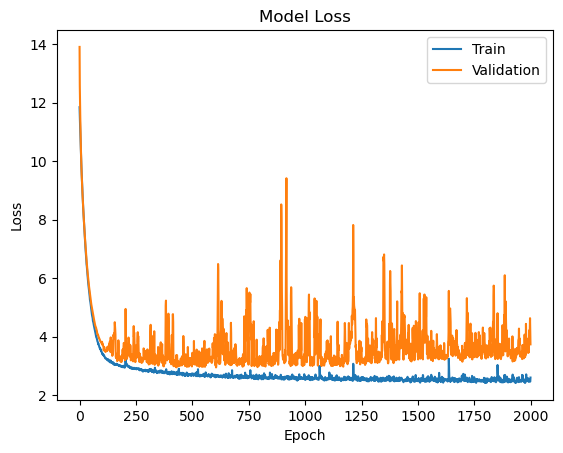

In [130]:
plt.plot(historyV2.history['loss'])
plt.plot(historyV2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

4/4 [==============================] - 0s 3ms/step
Plotting ROC for labels ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


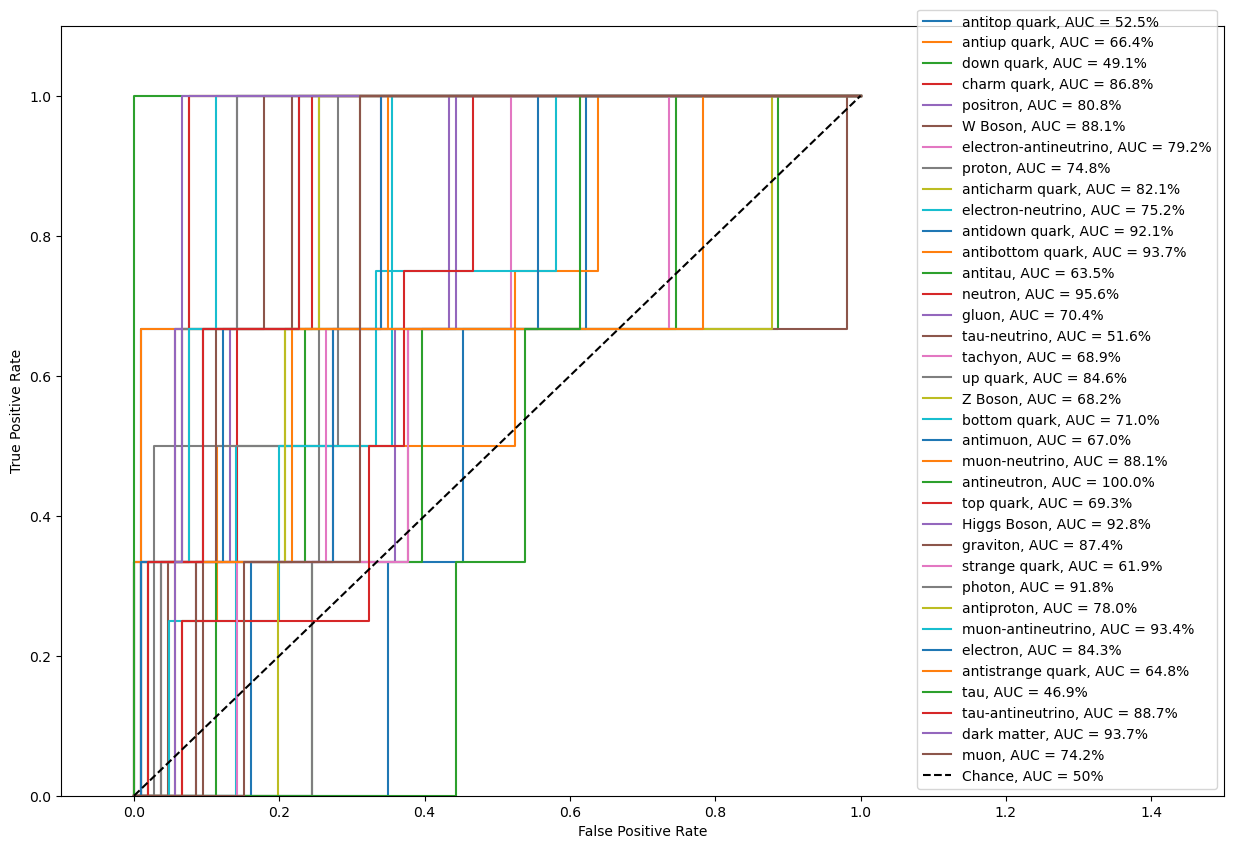

In [131]:
y_score = convNet.predict(X_test)
df = pd.DataFrame()
fpr  = {}
tpr  = {}
auc1 = {}
labels=['%i'%nr for nr in range (0,36)]
print('Plotting ROC for labels {}'.format(labels))

fig, ax = plt.subplots(figsize=(15, 10))
for i, label in enumerate(labels):
    df[label] = Y_test[:,int(label)]
    df[label + '_pred'] = y_score[:, int(label)]
    fpr[label], tpr[label], threshold = metrics.roc_curve(df[label],df[label+'_pred'])
    auc1[label] = metrics.auc(fpr[label], tpr[label])
    
    plt.plot(fpr[label],tpr[label], label=r'{}, AUC = {:.1f}%'.format(particle_types[int(label)],auc1[label]*100))

plt.plot([0,1], [0,1], "k--", label="Chance, AUC = 50%")
    
#plt.semilogx()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlim(-0.1,1.5)
plt.ylim(0,1.1)
plt.legend(loc='lower right')
plt.show()

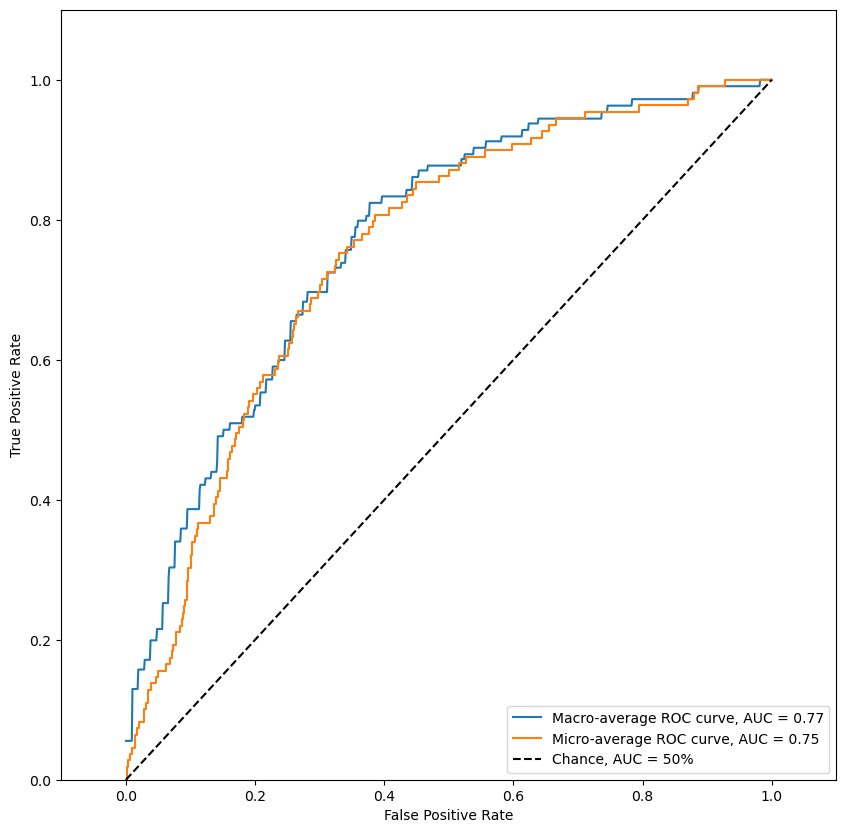

In [132]:
fig, ax = plt.subplots(figsize=(10, 10))

# Macro Average One vs Rest
macro_fpr = {}
macro_tpr = {}
macro_auc = {}
n_classes = 36
for i in range(n_classes):
    macro_fpr[i], macro_tpr[i], _ = metrics.roc_curve(Y_test[:, i], y_score[:, i])
    macro_auc[i] = metrics.auc(macro_fpr[i], macro_tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, macro_fpr[i], macro_tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

macro_auc = metrics.auc(fpr_grid, mean_tpr)

plt.plot(
    fpr_grid,
    mean_tpr,
    label=f"Macro-average ROC curve, AUC = {macro_auc:.2f}",
)

# Micro Average One vs Rest
test_ravel = Y_test.ravel()
pred_ravel = y_score.ravel()
micro_fpr, micro_tpr, threshold = metrics.roc_curve(test_ravel, pred_ravel)
auc = metrics.auc(micro_fpr, micro_tpr)
    
plt.plot(micro_fpr,micro_tpr, label=f"Micro-average ROC curve, AUC = {auc:.2f}")

plt.plot([0,1], [0,1], "k--", label="Chance, AUC = 50%")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlim(-0.1,1.1)
plt.ylim(0,1.1)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# The above results were produced without the hidden convolutinal layer outputs being batch normalized
# The AUC to beat is 0.72

In [133]:
# save keras model
outdir = '/Users/andy/particle_zoo/pretrained_models/' # change this accroding to where you're saving output files
convNet.save(outdir+'best_keras_model')


INFO:tensorflow:Assets written to: /Users/andy/particle_zoo/pretrained_models/best_keras_model/assets


INFO:tensorflow:Assets written to: /Users/andy/particle_zoo/pretrained_models/best_keras_model/assets


In [92]:
# Load the best keras model for FPGA firmware conversion
convNet = tf.keras.models.load_model(outdir+'best_keras_model')

In [93]:
import plotting
import hls4ml
config = hls4ml.utils.config_from_keras_model(convNet, granularity='model')
print("-----------------------------------------")
print("Configuration")
plotting.print_dict(config)
print("-----------------------------------------")

hls_model = hls4ml.converters.convert_from_keras_model(convNet,
                                                      hls_config=config,
                                                      output_dir='model_1/hls4ml_prj', 
                                                      board='pynq-z2')

Interpreting Model
Topology:
Layer name: input_21, layer type: Input
Layer name: batch_normalization_22, layer type: BatchNormalization
Layer name: conv2d_33, layer type: Conv2D
  -> Activation (linear), layer name: conv2d_33
Layer name: activation_44, layer type: Activation
Layer name: conv2d_34, layer type: Conv2D
  -> Activation (linear), layer name: conv2d_34
Layer name: activation_45, layer type: Activation
Layer name: max_pooling2d_11, layer type: MaxPooling2D
Layer name: conv2d_35, layer type: Conv2D
  -> Activation (linear), layer name: conv2d_35
Layer name: activation_46, layer type: Activation
Layer name: average_pooling2d_11, layer type: AveragePooling2D
Layer name: dense_11, layer type: Dense
  -> Activation (linear), layer name: dense_11
Layer name: batch_normalization_23, layer type: BatchNormalization
Layer name: activation_47, layer type: Activation
-----------------------------------------
Configuration
Model
  Precision:         ap_fixed<16,6>
  ReuseFactor:       1
 

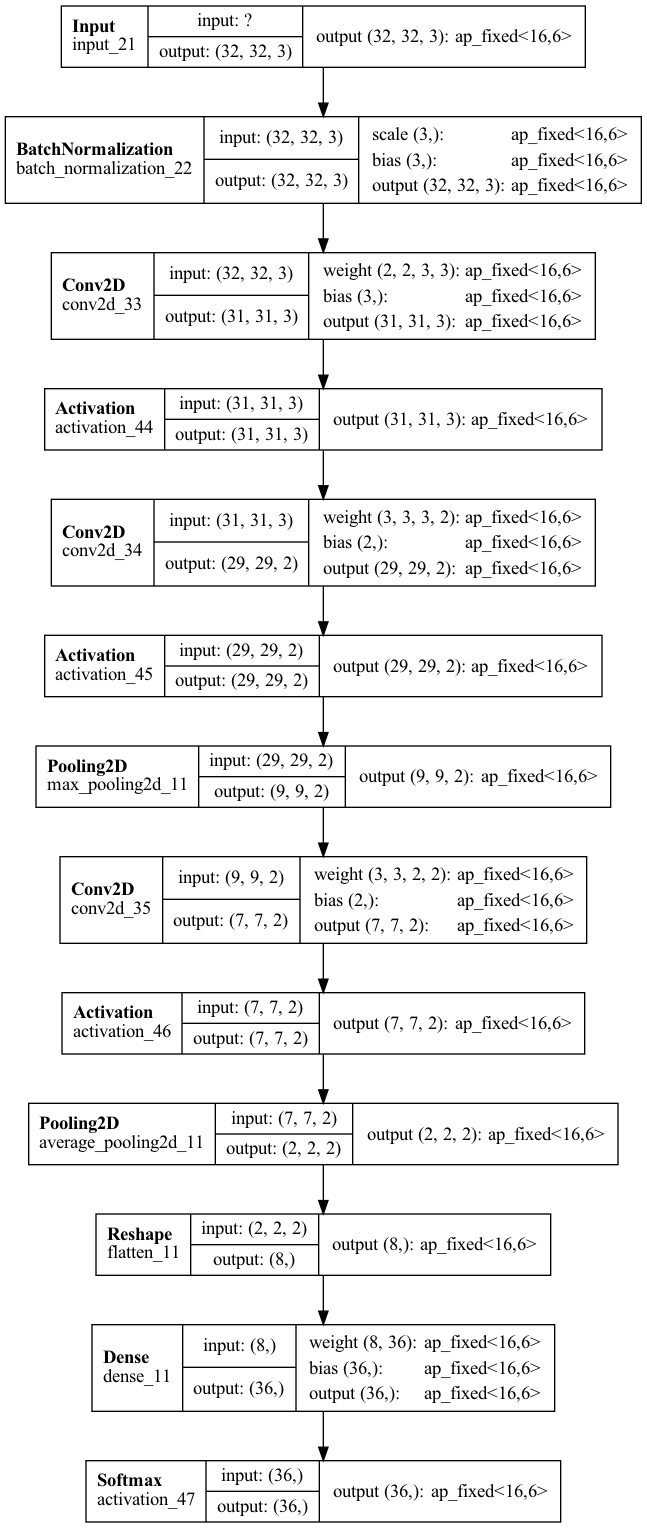

In [134]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)


In [95]:
# Create tf.Data input pipeline for the test data. (Maybe this is not necessary?)
# tst_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
# tst_dataset = tst_dataset.shuffle(buffer_size=10000)
# tst_dataset = tst_dataset.batch(batch_size).map(lambda x, y: (preprocessor(x), y))

In [135]:
# Test the hls4ml model
hls_model.compile()
X_test = X_test.astype(dtype='float32')
hls_pred = hls_model.predict(X_test)

Writing HLS project
Done


In [ ]:
# Compare hls4ml and keras model performance
# Note: there is a class imbalance in our data so precision and recall
# may be the better metric for model comparison
